In [1]:
from pathlib import Path
from aqara_video.core.video_reader import VideoReader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = "/Volumes/Cameras/aqara_video/lumi1.54ef44603857/20251023/102559.mp4"

In [ ]:
import cv2
import time

lower_yellow = np.array([25, 250, 250])  # adjust as needed
upper_yellow = np.array([35, 255, 255])

start = time.perf_counter()
video = VideoReader(Path(filepath))
print(f"Video FPS: {video.fps}")
for videoframe in video.frames(frame_skip=5):
    if videoframe.frame_id % 100 == 0:
        print(f"Processing frame {videoframe.frame_id}")

    frame = videoframe.frame
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Find bounding box around all yellow pixels
    coords = cv2.findNonZero(mask)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        print(
            f"Frame {videoframe.frame_id} - t={videoframe.t:.2f}s: Bounding box: x={x}, y={y}, w={w}, h={h}"
        )

end = time.perf_counter()
print(f"Processing time: {end - start:.2f} seconds")

Video FPS: 19.921516239458963
Processing frame 0
Processing frame 100
Processing frame 200
Processing frame 300
Processing frame 400
Processing frame 500
Processing frame 600
Processing frame 700
Processing frame 800
Processing frame 900
Processing frame 1000
Frame 1075 - t=53.96s: Bounding box: x=181, y=899, w=1, h=21
Frame 1080 - t=54.21s: Bounding box: x=1, y=536, w=1, h=2
Frame 1085 - t=54.46s: Bounding box: x=0, y=537, w=2, h=359
Frame 1090 - t=54.71s: Bounding box: x=1, y=551, w=1, h=1
Frame 1095 - t=54.97s: Bounding box: x=0, y=538, w=404, h=360
Processing frame 1100
Frame 1100 - t=55.22s: Bounding box: x=1204, y=536, w=688, h=300
Frame 1105 - t=55.47s: Bounding box: x=1940, y=560, w=2, h=272
Frame 1110 - t=55.72s: Bounding box: x=1564, y=530, w=450, h=125
Frame 1115 - t=55.97s: Bounding box: x=1470, y=530, w=488, h=288
Frame 1120 - t=56.22s: Bounding box: x=1406, y=536, w=490, h=54
Frame 1125 - t=56.47s: Bounding box: x=1232, y=530, w=400, h=238
Frame 1130 - t=56.72s: Bounding 

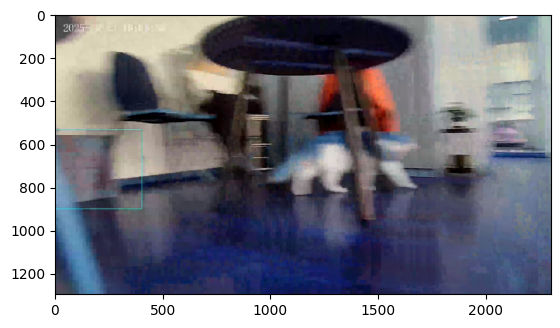

In [ ]:
plt.imshow(videoframe.frame)